# Исследование рынка заведений общественного питания Москвы

<hr style="border: 1px solid #000;"> 

## Описание проекта <br>

Планируется открыть небольшое кафе в Москве, где гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Инвесторов интересует текущее положение дел на рынке — сможет ли кафе снискать популярность на долгое время, когда все насмотрятся на роботов-официантов? Подготовим исследование рынка на основе открытых данных о заведениях общественного питания в Москве.

<b> Описание данных </b> Таблица df: <br>
•	id — идентификатор объекта; <br>
•	object_name — название объекта общественного питания; <br>
•	chain — сетевой ресторан; <br>
•	object_type — тип объекта общественного питания; <br>
•	address — адрес; <br>
•	number — количество посадочных мест.


<hr style="border: 1px solid #000;"> 

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  

!pip install plotly
import plotly.express as px
from plotly import graph_objects as go

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data.csv')  

In [3]:
df.info()
def obzor (d, n):
    return pd.concat([d.head(n), d.sample(n, random_state=42), d.tail(n)], axis=0)
obzor(df, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
12062,182973,БУРГЕР КИНГ,да,кафе,"город Москва, Ярославское шоссе, дом 69",60
8819,156321,Кафе «Тетя Мотя»,нет,кафе,"город Москва, проезд Сокольнического Круга, дом 7",100
14197,206042,Чебуречная,нет,магазин (отдел кулинарии),"город Москва, Открытое шоссе, дом 9, строение 9",0
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36
15365,222535,Шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10


In [4]:
df.isna().mean()

id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

In [5]:
df.duplicated().sum()

0

Загрузили датафрейм . Просмотрели инфо и по 3 строк начальных, конечных и рандомных. Видим разные написания названий кафе,  может нужно будет привести данные к единообразию. 15366  строк, пропусков и дублей нет.  Типы данных в порядке 

In [6]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [7]:
df['address'] = df['address'].str.lower()
df['object_name'] = df['object_name'].str.lower() 
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Привели адреса и названия обьектов к нижнему регистру.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

Отлично, что ты проверяешь дубликаты, но есть несколько комментариев по их проверке:
    
1. Обрати внимание, ты сначала проверяешь дубликаты, а потом стала приводить столбец к нижнему регистру. Возможно, именно приведение к нижнему регистру добавит количество дубликатов, которые могут определиться? Попробуй сначала посчитать количество дубликатов перед какими-либо манипуляциями со столбцами, затем приводи столбцы к нижнему регистру, оцени - изменилось количество дубликатов или нет. После такой проверки будет наглядно видна разница и ты поймешь все ли ты дубликаты нашла.<br><br>
2. По общей проверке дубликатов с помощью `df.duplicated().sum()`, действительно, дубликаты отсутствуют. При беглом взгляде на датасет стоит обратить на колонку `id`. Чаще всего такой столбец бывает уникальным в любой выгрузке данных, чтобы одназначно идентифицировать каждую строку (иногда бывают исключения, но очень редко). Таким образом, если проверять датасет методом `duplicated` без указания интересующих нас колонок для проверки, то метод проверит все колонки, а одна из них может быть уникальной - очевидно что дубликатов не будет найдено. Попробуй проверить уникальность поля `id` и сделай соответствующий вывод о дальнейшей проверке дубликатов.

</div>

In [8]:
df['object_name'].duplicated().sum()

5442

In [9]:
df.duplicated(subset=["object_name", "address"]).sum()

225

In [10]:
df['object_type'] = df['object_type'].replace('магазин (отдел кулинарии)', 'кулинария')
df['object_type'] = df['object_type'].replace('предприятие быстрого обслуживания', 'фастфуд') 

df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная', 'фастфуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

In [11]:
df['chain'] = df['chain'].replace('нет', 'несетевое')
df['chain'] = df['chain'].replace('да', 'сетевое')

df['chain'].unique()

array(['несетевое', 'сетевое'], dtype=object)

Для удобства изменили названия "магазин (отдел кулинарии)" - просто "кулинария" и "предприятие быстрого обслуживания" - "фастфуд". Переименовали сетевые и несетевые заведения.

In [12]:
symbol = [',', '"', '  ','«', '»', '(', ')']

for s in symbol:
    df['object_name'] = df['object_name'].str.replace(s, ' ')
    df['address'] = df['address'].str.replace(s, ' ')

df['address'] = df['address'].str.replace('ё','е')

Убрали лишние символы

In [13]:
df['object_name'].value_counts().head(10)
#df.query('chain == "да"').object_name.unique()

столовая           321
кафе               278
шаурма             250
шоколадница        158
kfc                155
макдоналдс         151
бургер кинг        137
теремок             94
домино'с пицца      90
крошка картошка     90
Name: object_name, dtype: int64

Здесь можно отметить, что больше всего простых заведений с обычными названиями "столовая", "кафе", "шаурма". У сетевых заведений в названиях много дубликатов типа: starbucks - старбакс - кофейня старбакс, subway - сабвей, чайхона №1 - чайхона №1 бутово и др. Скорее всего, лемматизацию применять не нужно.

In [14]:
obzor(df, 3)

,id,object_name,chain,object_type,address,number
0,151635,сметана,несетевое,кафе,город москва улица егора абакумова дом 9,48
1,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35
2,24309,кафе академия,несетевое,кафе,город москва абельмановская улица дом 6,95
12062,182973,бургер кинг,сетевое,кафе,город москва ярославское шоссе дом 69,60
8819,156321,кафе тетя мотя,несетевое,кафе,город москва проезд сокольнического круга дом 7,100
14197,206042,чебуречная,несетевое,кулинария,город москва открытое шоссе дом 9 строение 9,0
15363,209186,шоколадница,сетевое,кафе,город москва улица земляной вал дом 33,20
15364,221900,шоколадница,сетевое,кафе,город москва поселение московский киевское шос...,36
15365,222535,шоколадница,сетевое,кафе,город москва ходынский бульвар дом 4,10


<hr style="border: 1px solid #000;"> 

## Анализ данных

### Типы объектов общепита 

In [15]:
df['object_type'].value_counts(normalize=True) 

кафе          0.396915
столовая      0.168359
ресторан      0.148705
фастфуд       0.125146
бар           0.055707
буфет         0.038071
кафетерий     0.025901
закусочная    0.023428
кулинария     0.017766
Name: object_type, dtype: float64

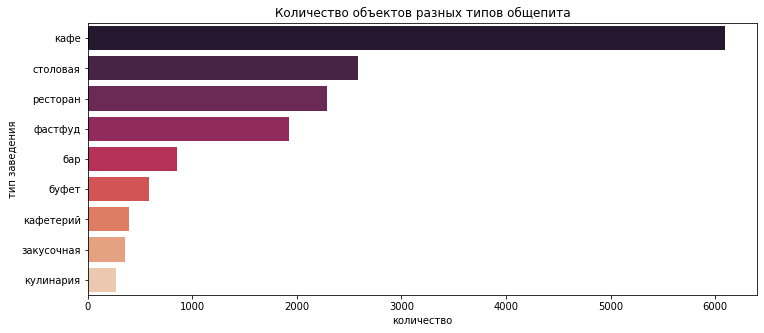

In [65]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(y = 'object_type', data = df, order = df['object_type'].value_counts().index, palette = 'rocket') 
plt.xlabel('количество')
plt.ylabel('тип заведения')
plt.title('Количество объектов разных типов общепита')
plt.show()

Наиболее распространенным обьектом общепита в Москве являются: кафе 40%, столовая 17%, ресторан 15%, фастфуд 12,5%. Далее бары 5,5% и буфеты 3,8%. Меньше всего в городе представлены кафетерии, закусочные и кулинарии (2,5-1,7%).

### Сетевые и несетевые заведения

In [18]:
chain = df.groupby('chain')['object_name'].count().sort_values()
#chain1 = df['chain'].value_counts(normalize=True)
  
chain

chain
сетевое       2968
несетевое    12398
Name: object_name, dtype: int64

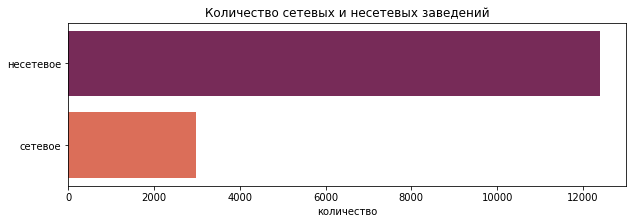

In [19]:
plt.figure(figsize = (10, 3))
ax = sns.countplot(y = 'chain', data = df, palette = 'rocket') 
plt.title('Количество сетевых и несетевых заведений')
plt.xlabel('количество')
plt.ylabel('')
#plt.grid()
plt.show() 

Сетевые заведения занимают пятую часть рынка, несетевых - в 4 раза больше.

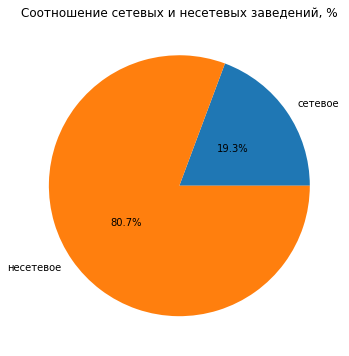

In [20]:
pie, ax = plt.subplots(figsize=[10,6])
labels = chain.keys()
sns.set_palette('rocket')
plt.pie(x = chain, autopct = "%.1f%%", labels = labels, pctdistance=0.5)
plt.title('Cоотношение сетевых и несетевых заведений, %')
plt.show()

### Сетевые и несетевые заведения по типу объекта

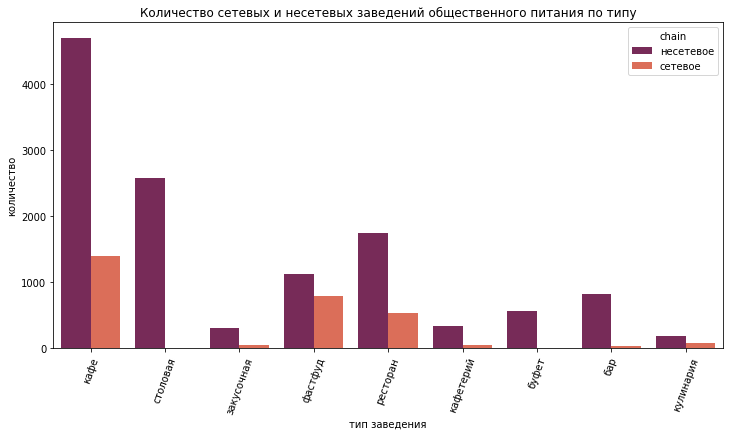

In [21]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x  ='object_type', data = df, hue = 'chain', palette = 'rocket') 
plt.xticks(rotation = 70)
plt.xlabel('тип заведения')
plt.ylabel('количество')
plt.title('Количество сетевых и несетевых заведений общественного питания по типу')
plt.show()
 

Сетевое распространение характерно для кафе, фастфуда и ресторанов. В гораздо меньшей доле для закусочных, кафетериев, баров, кулинарий.  

Рассмотрим доли.

In [22]:
object_chain = df.pivot_table(index = 'object_type', values = 'id',
                                     columns = 'chain', aggfunc = 'count')
object_chain 

chain,несетевое,сетевое
object_type,,
бар,819,37
буфет,574,11
закусочная,304,56
кафе,4703,1396
кафетерий,346,52
кулинария,195,78
ресторан,1741,544
столовая,2584,3
фастфуд,1132,791


In [23]:
object_chain_part = (((object_chain['сетевое'] / (object_chain['сетевое'] + object_chain['несетевое'])) * 100).reset_index())
#object_chain_part 

In [24]:
object_chain_part.columns = ['object_type','part']
object_chain_part.sort_values(by = 'part', ascending = False) 

,object_type,part
8,фастфуд,41.133645
5,кулинария,28.571429
6,ресторан,23.807440
3,кафе,22.888998
2,закусочная,15.555556
4,кафетерий,13.065327
0,бар,4.322430
1,буфет,1.880342
7,столовая,0.115964


Если оценить доли, то сетевое распространение наиболее характерно для фастфуда, что весьма предсказуемо. Далее идут кулинарии (!) и рестораны.  

### Сетевые заведения по количеству посадочных мест

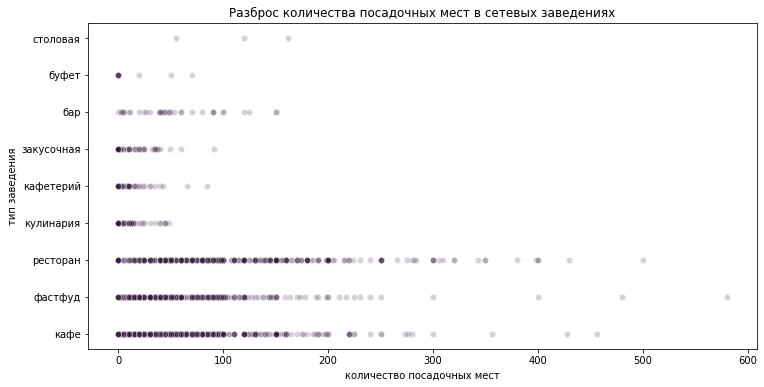

In [25]:
df_chains = df.loc[df['chain'] == 'сетевое']
sns.set_palette('rocket')
plt.figure(figsize = (12, 6))
sns.scatterplot(y = 'object_type', x = 'number', data = df_chains, alpha = 0.2, palette = 'rocket') 
plt.title('Разброс количества посадочных мест в сетевых заведениях')
plt.xlabel('количество посадочных мест')
plt.ylabel('тип заведения')
plt.show()
 

Для сетевых заведений характерно много заведений с небольшим числом посадочных мест. Для кафе, фастфуда и ресторанов  характерно большое количество заведений с числом посадочных мест до 100, свыше 200 мест - уже редкое явление. Также большое количество ресторанов имеют до 200 посадочных. Кулинарии, кафетерии и закусочные в основном имеют до 30 мест. В барах от 1 до 150.  

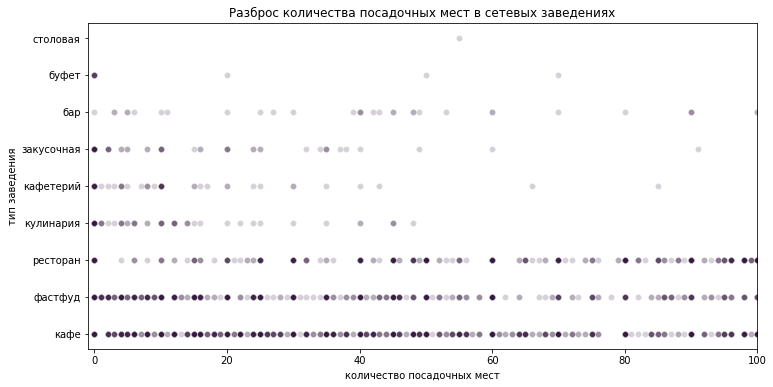

In [26]:
df_chains = df.loc[df['chain'] == 'сетевое']
sns.set_palette('rocket')
plt.figure(figsize = (12, 6))
sns.scatterplot(y = 'object_type', x = 'number', data = df_chains, alpha = 0.2, palette = 'rocket') 
plt.xlim(-1, 100)
plt.title('Разброс количества посадочных мест в сетевых заведениях')
plt.xlabel('количество посадочных мест')
plt.ylabel('тип заведения')
plt.show()
 

### Среднее количество посадочных мест по типу объекта

In [27]:
df[df['number'] == 0].shape

(1621, 6)

Для расчета среднего количества посадочных мест нужно было посмотреть много ли объектов с показателем 0. Оказалось их 1621, не берем их в расчет.

In [28]:
df1 = df[df['number'] != 0]

In [29]:
# number_mean = df1.groupby('object_type').agg(
#     {'number':'mean'}).reset_index().sort_values(by = 'number', ascending = False).round(1)

In [30]:
number_median = df.groupby('object_type').agg(
    {'number':'median'}).reset_index().sort_values(by = 'number', ascending = False)

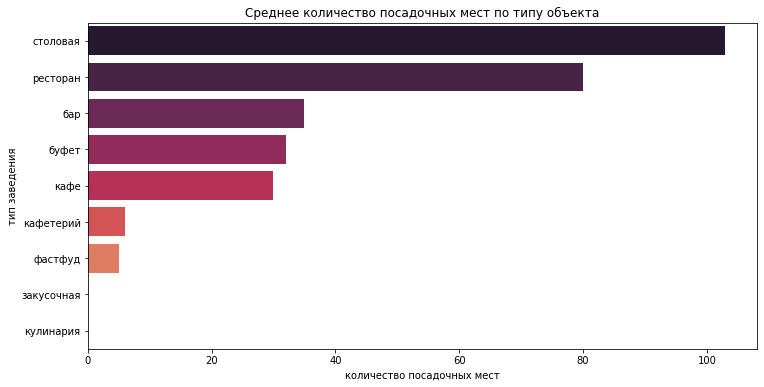

In [31]:
plt.figure(figsize = (12, 6)) 
sns.barplot(data = number_median, y = 'object_type', x = 'number', palette = 'rocket')
plt.title('Среднее количество посадочных мест по типу объекта')
plt.xlabel('количество посадочных мест')
plt.ylabel('тип заведения')
plt.show()

В среднем наибольшее количество посадочных мест в категориях столовая (104) и ресторан (80). <br>
Далее посмотрим боксплот.

In [32]:
df1.groupby('object_type')['number'].describe().sort_values(by='50%', ascending = False) 
# сорт по медиане

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,2568.0,131.210280,94.866549,1.0,55.0,104.5,200.0,1400.0
ресторан,2240.0,98.779464,94.694330,2.0,48.0,80.0,120.0,1500.0
буфет,517.0,57.854932,56.583103,1.0,20.0,40.0,80.0,320.0
бар,828.0,44.964976,67.721922,1.0,20.0,35.0,50.0,1700.0
кафе,5789.0,41.842805,37.550917,1.0,18.0,35.0,50.0,533.0
фастфуд,1219.0,32.421657,44.019413,1.0,6.0,20.0,42.5,580.0
закусочная,171.0,16.017544,21.213335,1.0,4.0,10.0,20.0,216.0
кафетерий,285.0,12.740351,15.916240,1.0,5.0,9.0,15.0,200.0
кулинария,128.0,11.921875,11.518290,1.0,4.0,8.5,15.0,50.0


Рейтинг по медиане и среднему совпадает.

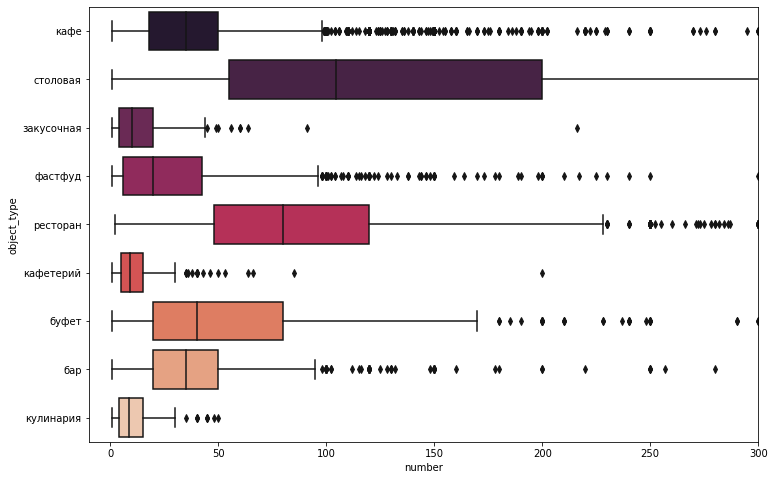

In [33]:
plt.figure(figsize = (12, 8)) 
ax = sns.boxplot(x = 'number', y = 'object_type', data = df1, palette = 'rocket')
plt.xlim(-10, 300)
plt.show()

Рестораны и столовые в основном имеют свыше 50 мест. Столовые от 60 до 200, рестораны от 50 до 130.
Закусочные, кафетерии и кулинарии располагают минимальным количеством мест. Кафе, фастфуды и бары - до 50 мест буфеты - до 80.

### Топ-10 улиц по количеству объектов общественного питания 

Выделим в отдельный столбец информацию об улице из столбца address

In [34]:
streets = df['address'].to_list()

In [35]:
street_col = []
for street in streets:  
    start = street.find('город москва')
    end = street.find('дом')
    street_col.append(street[start+12:end-1])

In [36]:
df['streetname'] = street_col

In [37]:
obzor(df, 3)

,id,object_name,chain,object_type,address,number,streetname
0,151635,сметана,несетевое,кафе,город москва улица егора абакумова дом 9,48,улица егора абакумова
1,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35,улица талалихина
2,24309,кафе академия,несетевое,кафе,город москва абельмановская улица дом 6,95,абельмановская улица
12062,182973,бургер кинг,сетевое,кафе,город москва ярославское шоссе дом 69,60,ярославское шоссе
8819,156321,кафе тетя мотя,несетевое,кафе,город москва проезд сокольнического круга дом 7,100,проезд сокольнического круга
14197,206042,чебуречная,несетевое,кулинария,город москва открытое шоссе дом 9 строение 9,0,открытое шоссе
15363,209186,шоколадница,сетевое,кафе,город москва улица земляной вал дом 33,20,улица земляной вал
15364,221900,шоколадница,сетевое,кафе,город москва поселение московский киевское шос...,36,поселение московский киевское шоссе 22-й кило...
15365,222535,шоколадница,сетевое,кафе,город москва ходынский бульвар дом 4,10,ходынский бульвар


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
streetname     15366 non-null object
dtypes: int64(2), object(5)
memory usage: 840.5+ KB


In [39]:
df_top = df.groupby('streetname', as_index = False)['object_name'].count().sort_values(
    by = 'object_name', ascending = False).head(10)
top10_list = list(df_top['streetname'])
df_top 

,streetname,object_name
1376,проспект мира,204
1380,профсоюзная улица,182
841,ленинградский проспект,170
1331,пресненская набережная,167
433,варшавское шоссе,155
845,ленинский проспект,147
1372,проспект вернадского,131
832,кутузовский проспект,114
749,каширское шоссе,103
2139,ходынский бульвар,102


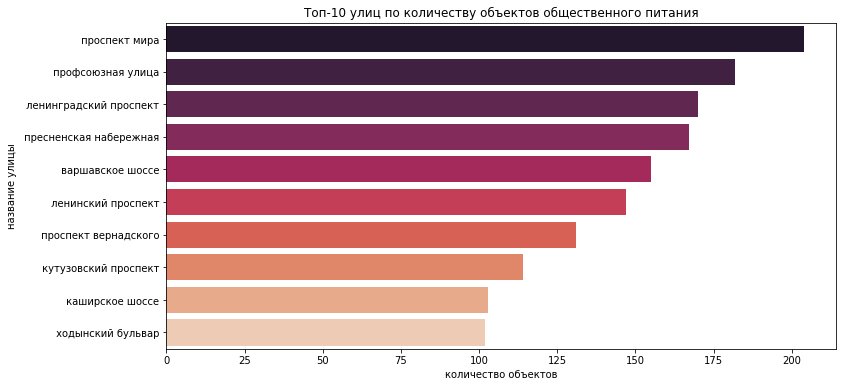

In [40]:
plt.figure(figsize = (12, 6)) 
ax = sns.barplot(x = 'object_name', y = 'streetname', data = df_top, palette = 'rocket')
ax.set_xlabel('количество объектов')
ax.set_ylabel('название улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.show()

Проспект Мира - лидер по количеству заведений. Далее с небольшим отрывом следую Профсоюзная улица, Ленинградский проспект и Пресненская набережная. Можно предположить, что количество заведений на данных улицах прямо связано с их протяженнностью.<br> Далее найдем в каких районах Москвы находятся эти улицы. Для этого мы нашли "список всех улиц Москвы и их привязка к районам".  

In [41]:
from io import BytesIO
import requests 
spreadsheet_id = '1TH16cAmxOiTkDypUUKoP0ygOt_sc25bX8ptW2FjJpQs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts = pd.read_csv(BytesIO(r.content))
#districts

In [42]:
districts['streetname'] = districts['streetname'].str.lower()
districts.sample(5, random_state = 42)

,streetname,areaid,okrug,area
1720,овражная улица,51,Зеленоград,Район Крюково
1108,1-я боевская улица,26,ВАО,Район Сокольники
2821,староспасская улица,88,СЗАО,Район Митино
3677,1-я фрезерная улица,117,ЮВАО,Нижегородский район
1862,улица нижняя масловка,54,САО,Район Аэропорт


Далее объединяем таблицу с районами и список топ10 улиц.

In [43]:
# уберем лишниие пробелы
df['streetname'] = df['streetname'].str.strip()
df_top['streetname'] = df_top['streetname'].str.strip()


In [44]:
df_top_dstr_new = df_top.merge(districts, on = 'streetname')
df_top_dstr_new

,streetname,object_name,areaid,okrug,area
0,проспект мира,204,70,СВАО,Алексеевский район
1,проспект мира,204,86,СВАО,Ярославский Район
2,проспект мира,204,78,СВАО,Район Марьина роща
3,проспект мира,204,79,СВАО,Останкинский район
4,проспект мира,204,81,СВАО,Район Ростокино
5,проспект мира,204,82,СВАО,Район Свиблово
6,проспект мира,204,16,ЦАО,Мещанский район
7,профсоюзная улица,182,123,ЮЗАО,Академический район
8,профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,профсоюзная улица,182,134,ЮЗАО,Район Ясенево


In [45]:
# объединим районы с основной таблицей.
df_new = df.merge(districts, on = 'streetname') 
df_new

,id,object_name,chain,object_type,address,number,streetname,areaid,okrug,area
0,151635,сметана,несетевое,кафе,город москва улица егора абакумова дом 9,48,улица егора абакумова,86,СВАО,Ярославский Район
1,193477,grill-house,несетевое,закусочная,город москва улица егора абакумова дом 14а,0,улица егора абакумова,86,СВАО,Ярославский Район
2,196756,пекарня,несетевое,кафетерий,город москва улица егора абакумова дом 14а,12,улица егора абакумова,86,СВАО,Ярославский Район
3,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35,улица талалихина,18,ЦАО,Таганский район
4,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35,улица талалихина,117,ЮВАО,Нижегородский район
...,...,...,...,...,...,...,...,...,...,...
27008,217710,кофе пью,несетевое,кафе,город москва гамсоновский переулок дом 2 строе...,38,гамсоновский переулок,98,ЮАО,Даниловский район
27009,213369,великолепный век,несетевое,ресторан,город москва улица кожевнический вражек дом 3а,38,улица кожевнический вражек,98,ЮАО,Даниловский район
27010,206426,чайхана мантыбар,несетевое,ресторан,город москва улица кожевнический вражек дом 3а,30,улица кожевнический вражек,98,ЮАО,Даниловский район
27011,213851,ресторан атмосфера,несетевое,ресторан,город москва улица василисы кожиной дом 1 корп...,49,улица василисы кожиной,48,ЗАО,Район Филевский Парк


In [46]:
df_new.isnull().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
streetname     0
areaid         0
okrug          0
area           0
dtype: int64

In [47]:
df_new.isnull().values.any()

False

### Число улиц с одним объектом общественного питания

In [48]:
# найдем число улиц с одним объектом общественного питания через срез

one_object_st = df.groupby('streetname').count().query('id == 1')
len(one_object_st)

810

810 улиц с одним объектом общественного питания.

In [49]:
one_object_st_dstr = one_object_st.merge(districts, on = 'streetname')
# one_object_st_dstr

In [50]:
# one_object_st_dstr = one_object_st.merge(districts, left_on = 'streetname', right_on = 'streetname')

In [51]:
one_object_st_dstr['area'].unique()

array(['Район Аэропорт', 'Басманный район', 'Красносельский район',
       'Район Свиблово', 'Рязанский район', 'Район Якиманка',
       'Район Хамовники', 'Район Соколиная Гора', 'Даниловский район',
       'Мещанский район', 'Таганский район', 'Район Лефортово',
       'Район Печатники', 'Район Сокольники', 'Район Замоскворечье',
       'Хорошевский район', 'Район Арбат', 'Район Марьина роща',
       'Алексеевский район', 'Район Текстильщики', 'Район Ростокино',
       'Район Раменки', 'Район Хорошево-Мневники',
       'Район Покровское-Стрешнево', 'Район Богородское',
       'Нижегородский район', 'Тверской район', 'Лосиноостровский район',
       'Район Ново-Переделкино', 'Район Измайлово',
       'Район Северное Измайлово', 'Район Восточное Измайлово',
       'Район Беговой', 'Донской район', 'Район Гольяново',
       'Войковский Район', 'Савеловский район', 'Район Преображенское',
       'Район Перово', 'Район Чертаново Южное', 'Южнопортовый Район',
       'Район Южное Бутово', '

Вывели весь список районов Москвы, где находятся улицы с одним объектом общественного питания. Далее найдем топ-10.

In [52]:
areas = one_object_st_dstr.groupby('area')['object_type'].count().sort_values(ascending = False).reset_index().head(10)
areas

,area,object_type
0,Таганский район,27
1,Район Хамовники,24
2,Басманный район,21
3,Тверской район,20
4,Пресненский район,19
5,Район Марьина роща,17
6,Район Арбат,17
7,Мещанский район,16
8,Район Сокольники,15
9,Район Замоскворечье,14


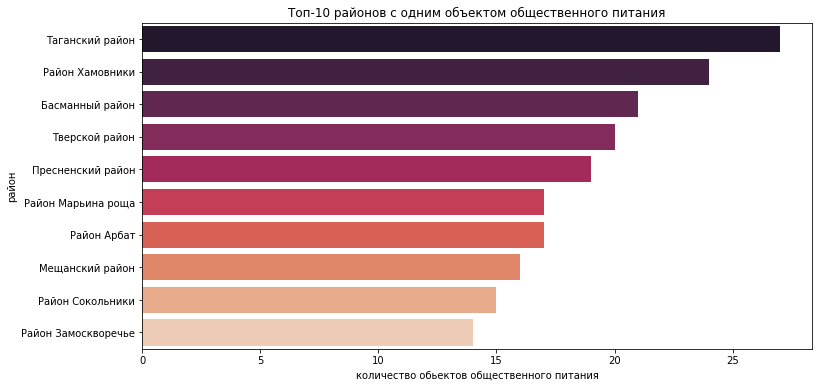

In [53]:
plt.figure(figsize = (12, 6)) 
sns.barplot(y = 'area', x = 'object_type', data = areas, palette = 'rocket')
plt.title('Топ-10 районов с одним объектом общественного питания')
plt.ylabel('район')
plt.xlabel('количество обьектов общественного питания')
plt.show()


Больше всего улиц с одним заведением в Таганском районе, Хамовниках и Басманном районе.

### Количество мест для улиц с большим количеством заведений

In [54]:
df['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Среднее количество посадочных мест для всех улиц - 59, медианное - 40.

Теперь посмотрим на распределение количества посадочных мест для топ-10 улиц с большим количеством объектов общественного питания.

In [55]:
tt = df_top.merge(df, on = 'streetname', how = 'left')

In [56]:
tt['number'].describe()

count    1475.000000
mean       55.561356
std        88.962401
min         0.000000
25%        12.000000
50%        35.000000
75%        70.000000
max      1700.000000
Name: number, dtype: float64

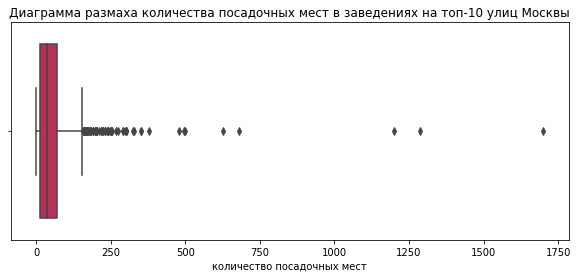

In [57]:
plt.figure(figsize = (10, 4)) 
ax = sns.boxplot(x = tt['number'], palette = 'rocket')
plt.title('Диаграмма размаха количества посадочных мест в заведениях на топ-10 улиц Москвы') 
plt.xlabel('количество посадочных мест')
plt.show()

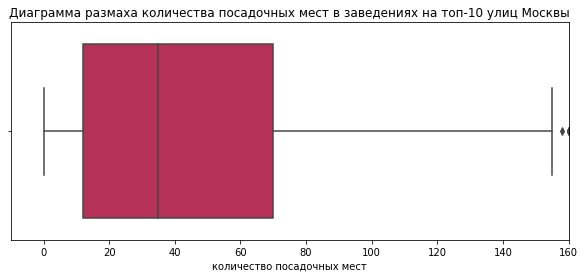

In [58]:
# приближаем график

plt.figure(figsize = (10, 4)) 
ax = sns.boxplot(x = tt['number'], palette = 'rocket')
plt.xlim(-10, 160)
plt.title('Диаграмма размаха количества посадочных мест в заведениях на топ-10 улиц Москвы') 
plt.xlabel('количество посадочных мест')
plt.show()

В среднем количество посадочных мест составляет от 12 до 70. Медиана 35, среднее 55. Выбросы свыше 155.

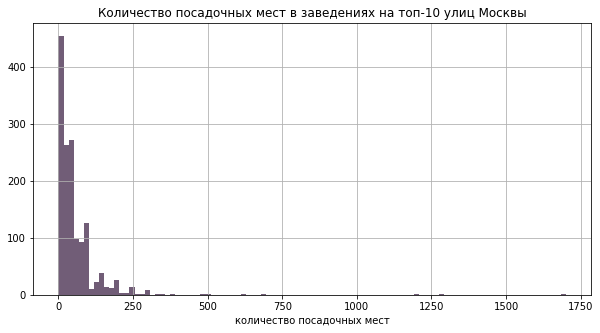

In [59]:
plt.figure(figsize = (10, 5))
tt['number'].hist(bins = 100, alpha = .7)
plt.title('Количество посадочных мест в заведениях на топ-10 улиц Москвы') 
plt.xlabel('количество посадочных мест')
plt.show()

Подавляющее большинство заведений небольшого формата. Малая часть заведений имеет больше 100 посадочных мест, а больше 250 - вообще редкое явление.

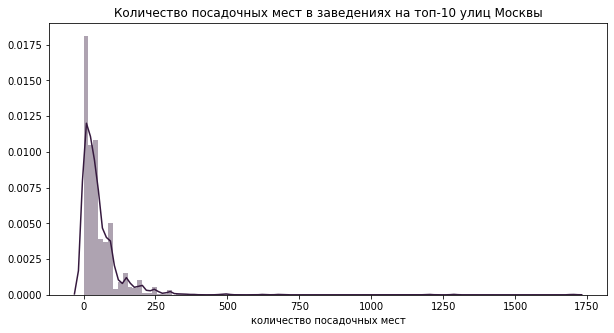

In [60]:
plt.figure(figsize = (10, 5))
sns.distplot(tt['number'], bins = 100) 
plt.title('Количество посадочных мест в заведениях на топ-10 улиц Москвы') 
plt.xlabel('количество посадочных мест')
plt.show()

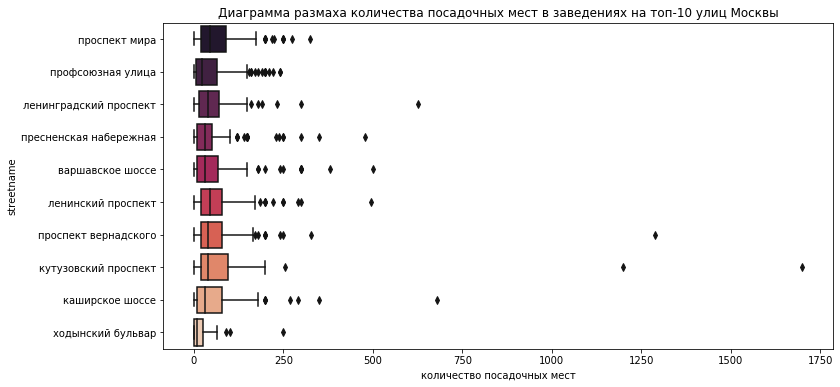

In [61]:
plt.figure(figsize = (12, 6)) 
sns.boxplot(y = "streetname", x = "number",  data = tt, palette = 'rocket') 
 
plt.title('Диаграмма размаха количества посадочных мест в заведениях на топ-10 улиц Москвы') 
plt.xlabel('количество посадочных мест')
plt.show()

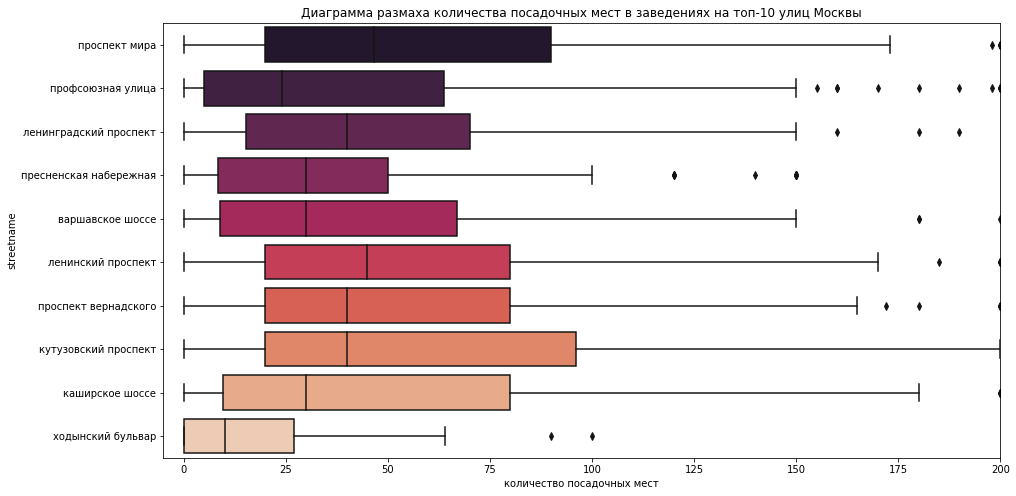

In [62]:
plt.figure(figsize = (15, 8)) 
sns.boxplot(y = "streetname", x = "number",  data = tt, palette = 'rocket') 
plt.xlim(-5, 200)
plt.title('Диаграмма размаха количества посадочных мест в заведениях на топ-10 улиц Москвы') 
plt.xlabel('количество посадочных мест')
plt.show()

На боксплоте видно, что большинство заведений на топ-10 улицах имеют небольшое количество мест: от 10 до 70. В основном их не больше сотни. Медиана 35. <br> Больше всего мест наблюдается на Кутузовском и проспекте Мира. Минимальный показатель у Ходынского бульвара.

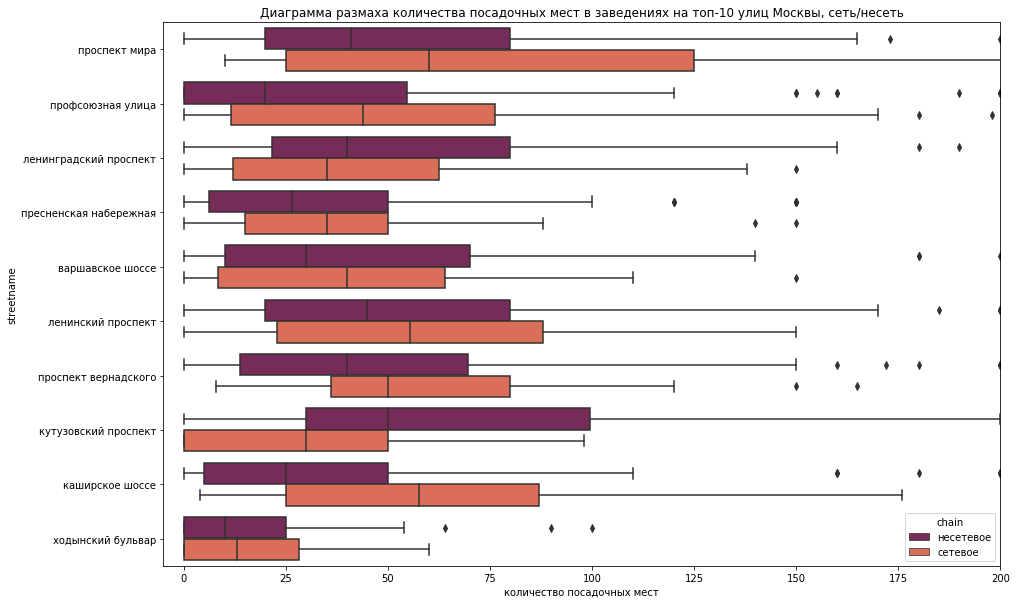

In [63]:
plt.figure(figsize = (15, 10)) 
sns.boxplot(y = 'streetname', x = 'number',  data = tt, hue = 'chain', palette = 'rocket') 
plt.xlim(-5, 200)
plt.title('Диаграмма размаха количества посадочных мест в заведениях на топ-10 улиц Москвы, сеть/несеть') 
plt.xlabel('количество посадочных мест')
plt.show()

Количество мест в сетевых заведениях намного больше чем в сетевых на следующих улицах: пр-т Мира, ул. Профсоюзная, Ленинский пр-т, Каширское шоссе. Обратная ситуация наблюдается на Ленинградском и Кутузовском.

<hr style="border: 1px solid #000;"> 

## Вывод

Мы обработали датафрейм о предприятиях общественного питания г. Москва и подготовили данные для анализа: привели адреса и названия обьектов к нижнему регистру, убрали лишние символы, переименовали сетевые и несетевые заведения. Для удобства изменили названия двух типов заведений. Добавили новый столбец с названием улиц, необходимый для дальнейших расчетов. 

Мы выяснили, что наиболее распространенным объектом общественного питания в Москве является кафе, затем идут столовые, рестораны и фастфуд. Сетевые заведения занимают пятую часть рынка, то есть несетевых - в четыре раза больше. Сетевое распространение характерно для кафе, фастфуда и ресторанов. В гораздо меньшей доле для закусочных, кафетериев, баров, кулинарий. <br> <br>
Как правило для сетевых заведений Москвы характерно много заведений с небольшим числом посадочных мест. Для кафе, фастфуда и ресторанов характерно большое количество заведений с числом посадочных мест до 100, большое количество ресторанов имеют до 200 посадочных. Кулинарии, кафетерии и закусочные в основном имеют до 30 мест. <br> 

В среднем наибольшее количество посадочных мест - в категориях столовая (104) и ресторан (80). <br> Буфет, бар и кафе 35-40, фастфуд 20. Закусочная, кафетерий, кулинария - около 10.

Проспект Мира - лидер по количеству заведений. Далее с небольшим отрывом следую Профсоюзная улица, Ленинградский проспект и Пресненская набережная. Можно предположить, что количество заведений на данных улицах прямо связано с их протяженнностью. <br> 
Больше всего улиц с одним заведением в Таганском районе, Хамовниках и Басманном районе.
<br> 


В среднем количество посадочных мест для топ-10 улиц составляет от 12 до 70, медианное количство - 35. Таким образом, подавляющее большинство заведений имеют небольшой формат. Малая часть заведений располагает сотней посадочных мест, а больше 250 - вообще редкое явление. 
Больше всего мест наблюдается у заведений, расположенных на Кутузовском и проспекте Мира. Минимальный показатель у Ходынского бульвара.

Исходя из описания задачи, можно рекомендовать, например, открытие флагманского заведения будущей сети кафе с роботами в районе Сити на Пресненской набережной, как на одной из улиц из топ-10. Количество посадочных мест не должно превышать 40-50, дабы подчеркнуть уникальность объекта.<br> Хотим отметить, что предоставленной информации очень мало и сложно делать адекватные рекомендации. Нет информации о целевой аудитории, о среднем чеке, о подробной концепции заведения. Может, инвесторы вообще хотят открыть сеть столовых с роботами на 100 посадочных у метро.  <br> Размещение на улицах с большим количеством объектов не всегда может дать синергетический эффект. Может быть, инвесторы захотят выбрать перспективный или знаковый туристический район. 

<hr style="border: 1px solid #000;"> 

## Презентация

Доступна по ссылке:  https://docs.google.com/presentation/d/1H8rFpk9NDLdwbR_YWRhXZHlEsC2sS_CJzauC0qzeklM